In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

plt.style.use("ggplot")

In [2]:
df = pd.read_csv("./data/real_estate.csv")

/tmp/ipykernel_2705/2423213859.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/real_estate.csv")


In [3]:
df.head()

,title,price_geo,unit_price_geo,price_usd,unit_price_usd,city,district,subdistrict,street,real_estate_type,...,bedrooms,toilet,floor,building_floors,project,status,state,agency_name,company_name,project_name
0,იყიდება 3 ოთახიანი ბინა დიდ დიღომში,144000.0,1920.0,53600.0,715.0,თბილისი,ვაკე-საბურთალო,დიდი დიღომი,მირიან მეფის ქ.,ბინა,...,2,1,6,14.0,არასტანდარტული,Active,თეთრი კარკასი,NaN,NaN,NaN
1,იყიდება 4 ოთახიანი ბინა დიღმის მასივში,289000.0,3620.0,108000.0,1350.0,თბილისი,დიდუბე-ჩუღურეთი,დიღმის მასივი,ბობ უოლშის ქ.,ბინა,...,2,1,3,9.0,NaN,Active,ახალი რემონტით,NaN,NaN,NaN
2,იყიდება 4 ოთახიანი ბინა ორთაჭალაში,503000.0,4980.0,188000.0,1860.0,თბილისი,ისანი-სამგორი,ორთაჭალა,არტურ ლაისტის ქ.,ბინა,...,3,1,13,33.0,NaN,Active,ახალი რემონტით,NaN,NaN,NaN
3,იყიდება 2 ოთახიანი ბინა გლდანში,218000.0,3880.0,81300.0,1450.0,თბილისი,გლდანი-ნაძალადევი,გლდანი,ქერჩის ქ.,ბინა,...,1,1,15,19.0,NaN,Active,ახალი რემონტით,NaN,NaN,NaN
4,იყიდება 5 ოთახიანი ბინა საბურთალოზე,602000.0,3540.0,225000.0,1320.0,თბილისი,ვაკე-საბურთალო,საბურთალო,ფანასკერტელის ქ.,ბინა,...,3,2,8,9.0,ჩეხური,Active,ძველი რემონტით,NaN,NaN,NaN


## Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19495 entries, 0 to 19494
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             19495 non-null  object 
 1   price_geo         19330 non-null  float64
 2   unit_price_geo    18598 non-null  float64
 3   price_usd         19330 non-null  float64
 4   unit_price_usd    18598 non-null  float64
 5   city              19495 non-null  object 
 6   district          18546 non-null  object 
 7   subdistrict       19202 non-null  object 
 8   street            19202 non-null  object 
 9   real_estate_type  19495 non-null  object 
 10  deal_type         19495 non-null  object 
 11  date              19495 non-null  object 
 12  air_conditioning  19495 non-null  bool   
 13  balcony           19495 non-null  bool   
 14  basement          19495 non-null  bool   
 15  cable_television  19495 non-null  bool   
 16  drinking_water    19495 non-null  bool  

In [5]:
df.drop(
    columns= [
        "agency_name", "company_name", "project_name", "status", "real_estate_type",
        "deal_type", "price_usd", "unit_price_geo", "unit_price_usd", "title", "date"
    ], 
    inplace=True
)

In [6]:
df["toilet"] = df["toilet"].replace({"არ აქვს": 0, "5+": "5"}).astype(float)

In [7]:
imputer = KNNImputer(n_neighbors=5)

x = imputer.fit_transform(df[["toilet"]])
df["toilet"] = pd.Series(x.T.reshape(-1))

In [8]:
df["area"] = df["area"].fillna(df["area"].mode()[0])
df["rooms"] = df["rooms"].fillna(df["rooms"].mode()[0])
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].mode()[0])
df["floor"] = df["floor"].fillna(df["floor"].mode()[0])
df["building_floors"] = df["building_floors"].fillna(df["building_floors"].mode()[0])

In [9]:
df.groupby(by="state").size()

state
ახალი რემონტით       11034
გარემონტებული         1634
თეთრი კარკასი         1531
მიმდინარე რემონტი      215
მწვანე კარკასი        1382
სარემონტო              437
შავი კარკასი           832
ძველი რემონტით        2085
dtype: int64

In [10]:
df["state"] = df["state"].fillna(df["state"].mode()[0])

In [11]:
df.dropna(subset=["price_geo", "city", "district", "subdistrict", "street"], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18397 entries, 0 to 19494
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_geo         18397 non-null  float64
 1   city              18397 non-null  object 
 2   district          18397 non-null  object 
 3   subdistrict       18397 non-null  object 
 4   street            18397 non-null  object 
 5   air_conditioning  18397 non-null  bool   
 6   balcony           18397 non-null  bool   
 7   basement          18397 non-null  bool   
 8   cable_television  18397 non-null  bool   
 9   drinking_water    18397 non-null  bool   
 10  electricity       18397 non-null  bool   
 11  elevator          18397 non-null  bool   
 12  fridge            18397 non-null  bool   
 13  furniture         18397 non-null  bool   
 14  garage            18397 non-null  bool   
 15  glazed_windows    18397 non-null  bool   
 16  heating           18397 non-null  bool   
 17

In [13]:
q_low = df["price_geo"].quantile(0.01)
q_hi  = df["price_geo"].quantile(0.85)

df_filtered = df[(df["price_geo"] < q_hi) & (df["price_geo"] > q_low)]

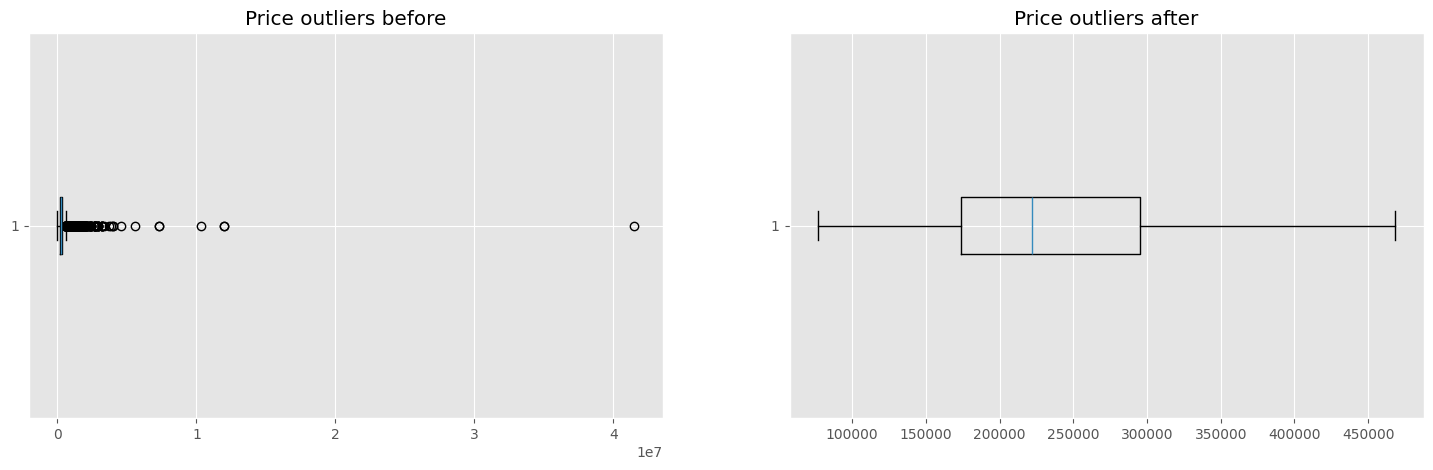

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].boxplot(df["price_geo"], vert=False)
axs[0].set_title("Price outliers before")
axs[1].boxplot(df_filtered["price_geo"], vert=False)
axs[1].set_title("Price outliers after")
plt.show()

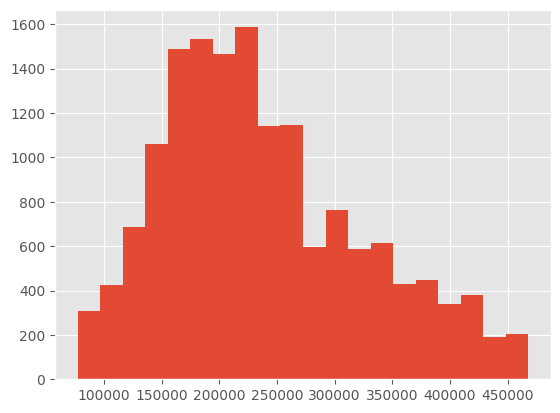

In [15]:
plt.hist(df_filtered["price_geo"], bins=20)
plt.show()

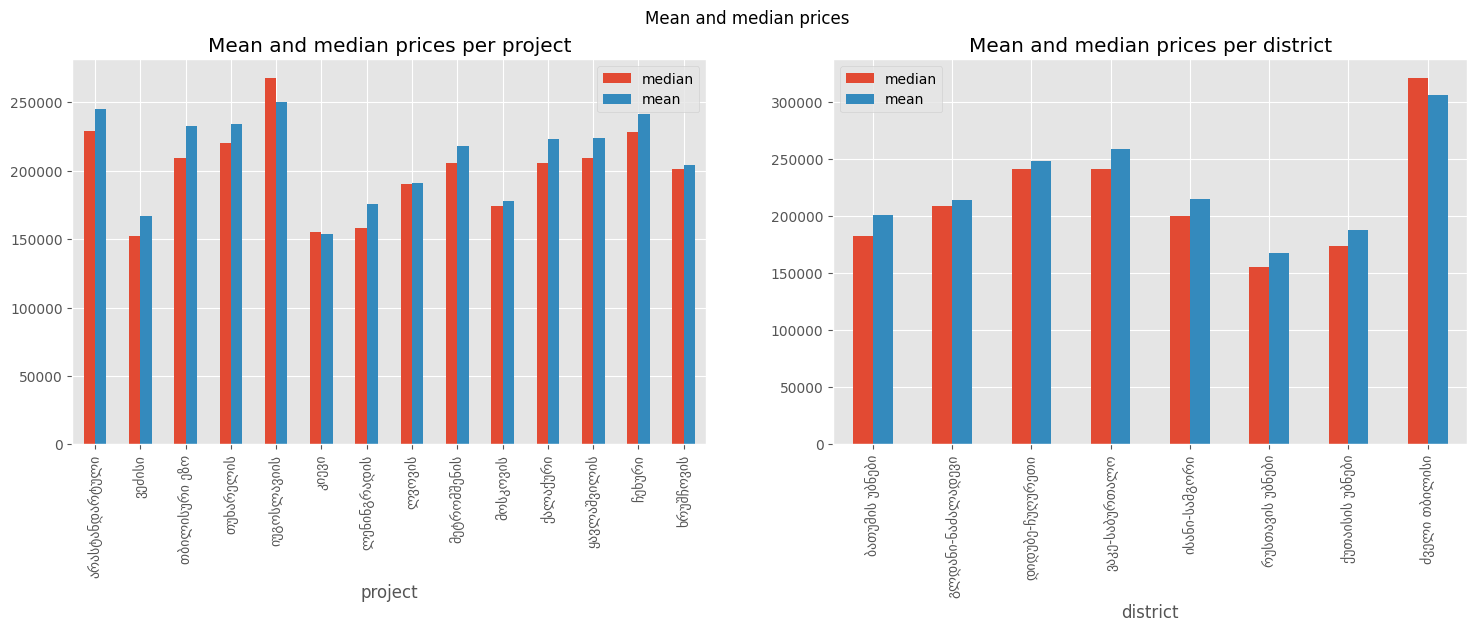

In [16]:
fig, axs= plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle("Mean and median prices")


for i, col in enumerate(["project", "district"]):
    pd.concat([
        df_filtered.groupby(by=col)["price_geo"].median().rename("median"),
        df_filtered.groupby(by=col)["price_geo"].mean().rename("mean")
    ], axis=1).plot(kind="bar", ax=axs[i], title=f"Mean and median prices per {col}")

plt.show()

Text(0.5, 1.0, 'ხრუშჩოვის heatmap')

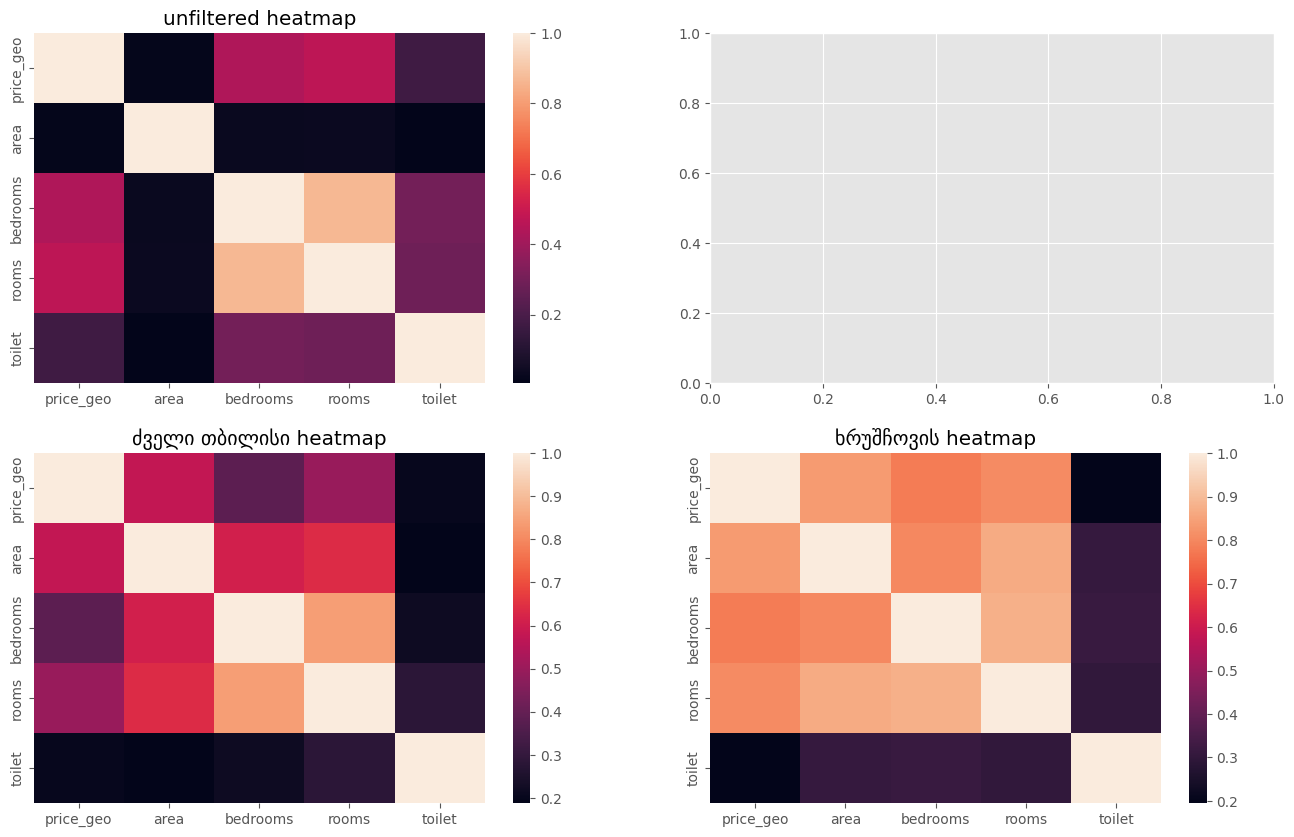

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
sns.heatmap(df_filtered[["price_geo", "area", "bedrooms", "rooms", "toilet"]].corr(numeric_only=True), ax=axs[0][0])
axs[0][0].set_title("unfiltered heatmap")

df_oldt = df_filtered[df_filtered["district"] == "ძველი თბილისი"]
sns.heatmap(df_oldt[["price_geo", "area", "bedrooms", "rooms", "toilet"]].corr(numeric_only=True), ax=axs[1][0])
axs[1][0].set_title("ძველი თბილისი heatmap")


df_xr = df_filtered[df_filtered["project"] == "ხრუშჩოვის"]
sns.heatmap(df_xr[["price_geo", "area", "bedrooms", "rooms", "toilet"]].corr(numeric_only=True), ax=axs[1][1])
axs[1][1].set_title("ხრუშჩოვის heatmap")

In [18]:
cat_variables = ["city", "district", "subdistrict", "project", "state"]
cat_data = df_filtered[cat_variables]
cat_dummies = pd.get_dummies(cat_data, drop_first=True)

In [19]:
df_encoded = df_filtered.drop(cat_variables, axis=1)
df_encoded = pd.concat([df_encoded, cat_dummies], axis=1)

In [20]:
df_encoded.drop(columns=["street"], inplace=True)

In [21]:
imputer = KNNImputer(n_neighbors=5)
df_full = pd.DataFrame(imputer.fit_transform(df_encoded),columns = df_encoded.columns)

In [22]:
df_full.head()

,price_geo,air_conditioning,balcony,basement,cable_television,drinking_water,electricity,elevator,fridge,furniture,...,project_ყავლაშვილის,project_ჩეხური,project_ხრუშჩოვის,state_გარემონტებული,state_თეთრი კარკასი,state_მიმდინარე რემონტი,state_მწვანე კარკასი,state_სარემონტო,state_შავი კარკასი,state_ძველი რემონტით
0,144000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,289000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,218000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,238000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,442000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model

In [23]:
y = df_full["price_geo"]
X = df_full.drop(columns=["price_geo"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.inspection import permutation_importance

model_fi = permutation_importance(model, X_train, y_train)

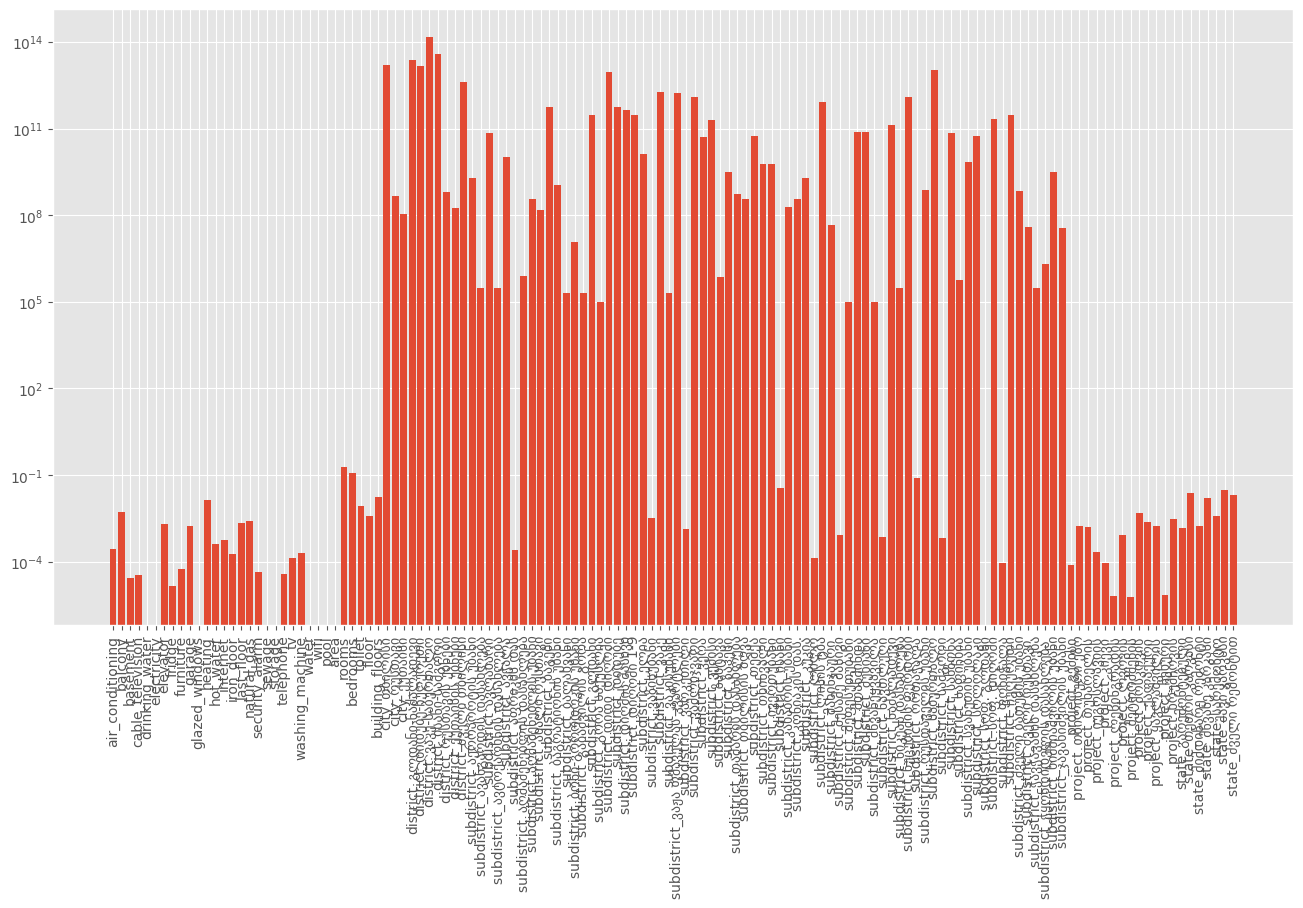

In [26]:
X_train.columns
plt.figure(figsize=(16, 8))
plt.bar(X_train.columns, model_fi["importances_mean"])
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()


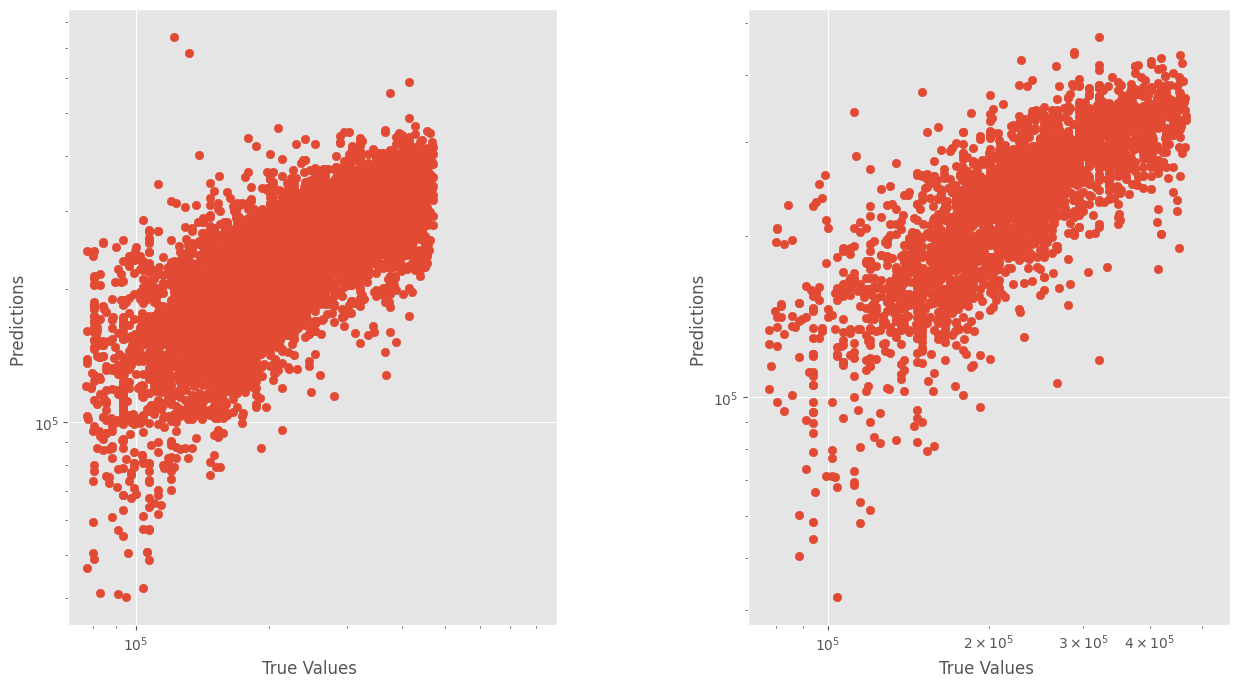

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].scatter(y_train, model.predict(X_train))
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel('True Values ')
axs[0].set_ylabel('Predictions ')
axs[0].axis('equal')
axs[0].axis('square')

axs[1].scatter(y_test, model.predict(X_test))
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('True Values ')
axs[1].set_ylabel('Predictions ')
axs[1].axis('equal')
axs[1].axis('square')
plt.show()

In [28]:
train_metrics = pd.DataFrame([[
    mean_squared_error(y_train, model.predict(X_train)),
    mean_absolute_error(y_train, model.predict(X_train)),
    root_mean_squared_error(y_train, model.predict(X_train)),
    r2_score(y_train, model.predict(X_train)),
]], columns=["MSE", "MAE", "RMSE", "R^2"], index=["Train"])

In [29]:
test_metrics = pd.DataFrame([[
    mean_squared_error(y_test, model.predict(X_test)),
    mean_absolute_error(y_test, model.predict(X_test)),
    root_mean_squared_error(y_test, model.predict(X_test)),
    r2_score(y_test, model.predict(X_test)),
]], columns=["MSE", "MAE", "RMSE", "R^2"], index=["Test"])

In [30]:
pd.concat([train_metrics, test_metrics]).round(2)

,MSE,MAE,RMSE,R^2
Train,2.979141e+09,41032.90,5.458151e+04,6.100000e-01
Test,5.300128e+18,41550119.29,2.302201e+09,-7.210754e+08
